Text(0, 0.5, 'Y')

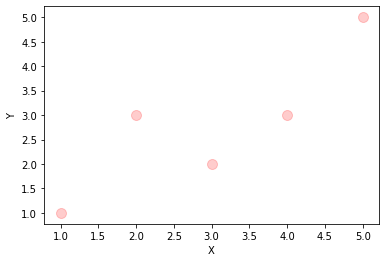

In [7]:
import matplotlib.pyplot as mp
x =[1,2,4,3,5]
y = [1,3,3,2,5]
mp.scatter(x, y, c = 'red', s =100, alpha=0.2)
mp.xlabel("X")
mp.ylabel("Y")

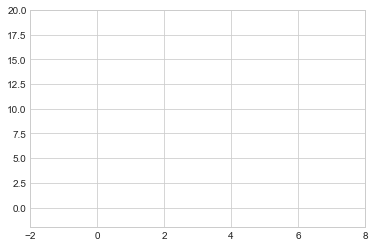

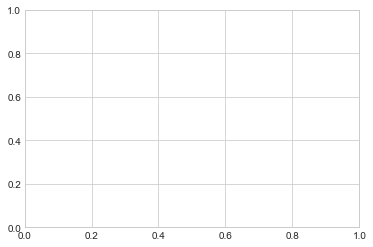

In [10]:
mp.style.use("seaborn-whitegrid")
mp.xlim(-2,8)
mp.ylim(-2,20)
graph = mp.figure()
ax = mp.axes()

In [12]:
import pandas as pd

In [15]:
data_df = pd.read_csv("lreg.csv")

In [16]:
data_df

,x,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


Text(0, 0.5, 'Y')

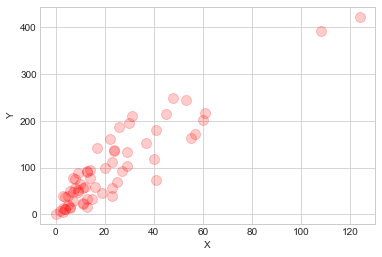

In [17]:
mp.scatter(data_df['x'], data_df['y'], c = 'red', s =100, alpha=0.2)
mp.xlabel("X")
mp.ylabel("Y")

In [18]:
x =[1,2,4,3,5]
y = [1,3,3,2,5]

In [41]:
#mean(x) = sum(x)/count(x)

def mean_values(values):
    mean_value = sum(values)/float(len(values))
    return mean_value

In [42]:
mean_values(x)

3.0

In [56]:
#Variance = sum((x-mean(x))**2)
def variance(values, mean):    
    return sum([(i-mean)**2 for i in values])

In [57]:
mean_x = mean_values(x)

In [58]:
mean_x

3.0

In [59]:
mean_y = mean_values(y)

In [60]:
mean_y

2.8

In [63]:
var_x = variance(x, mean_x)
var_y = variance(y, mean_y)

In [66]:
print(f"Mean of X = {mean_x} and Variance of X is {var_x} \nMean of Y = {mean_y} and Variance of Y is {var_y}")

Mean of X = 3.0 and Variance of X is 10.0 
Mean of Y = 2.8 and Variance of Y is 8.8


In [76]:
#covariance = sum((x(i)-mean(x)) * y(i) - mean(y))
#x =[1,2,4,3,5]
#y = [1,3,3,2,5]
def covariance(x,mean_x,y,mean_y):
    cov = 0
    for i in range(len(y)):
        cov+=((x[i]-mean_x)*(y[i]-mean_y))
    return cov

In [77]:
covarianc = covariance(x,mean_x,y,mean_y)
print(covarianc)

8.0


In [91]:
#coefficient = covarience(x,y)/varience(indipendent value)
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    mean_x, mean_y = mean_values(x),mean_values(y)
    m = covariance(x,mean_x,y,mean_y)/variance(x, mean_x)
    c = (mean_y) - (m*mean_x)
    return m,c

In [79]:
coefficient

0.8

In [80]:
#constant/intercept/B0/C = mean(y) - B1*mean(x)


In [81]:
intercept = (mean_y) - (coefficient*mean_x)

In [82]:
intercept

0.39999999999999947

In [83]:
#y = intercept+coefficient*x

TypeError: can't multiply sequence by non-int of type 'float'

In [93]:
import math
def rmse_values(actual,predicted):
    sum_error = 0
    for i in range(len(actual)):
        predict_err = predicted[i] - actual[i]
        sum_error += predict_err**2
    err_mean = sum_error/float(len(actual))
    return math.sqrt(err_mean)

In [101]:
def getting_algorithm(dataset,algorith):
    test_data = list()
    for line in dataset:
        line_copy = list(line)
        line_copy[-1] = None
        test_data.append(line_copy)
    predicted = algorith(dataset,test_data)
    print(predicted)
    actual = [line[-1] for line in dataset]
    rmse = rmse_values(actual, predicted)
    return rmse

In [102]:
def l_regression(train, test):
    prediction = list()
    c,m= coefficients(train)
    for row in test:
        y = c+m*row[0]
        prediction.append(y)
    return prediction
    

In [103]:
#x =[1,2,4,3,5]
#y = [1,3,3,2,5]
raw_data = [[1,1],[2,3],[4,3],[3,2],[5,5]]
getting_algorithm(raw_data, l_regression)

[1.1999999999999995, 1.599999999999999, 2.3999999999999977, 1.9999999999999984, 2.799999999999997]


1.2000000000000015

In [99]:
y = [1.1999999999999995, 1.599999999999999, 2.3999999999999977, 1.9999999999999984, 2.799999999999997]
x =[1,2,4,3,5]

Text(0, 0.5, 'Y')

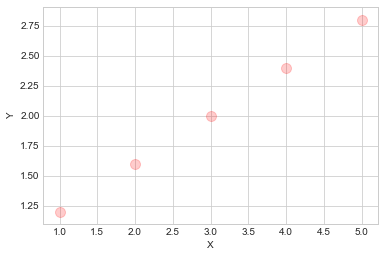

In [100]:
mp.scatter(x, y, c = 'red', s =100, alpha=0.2)
mp.xlabel("X")
mp.ylabel("Y")